# Deep Learning Project

## Automatic Image Tagging for Fashion E-commerce  

Saman Zargarzadeh, Devy Yeap, Tiantian Gu, Tannaz Ebrahimi, Xia-Rong Zhang

### Explain the problem:

This dataset contains a large number of images and corresponding fashion/apparel segmentations.
For this step of project we made a dataset which has three columns:

“ImageId” - the unique ID of an image

“SetClassID” - the identified attributes ID’s of the image, such as “shirt, blouse”, “sweater”, etc

“Class” -  1 if identified attributes contain “dress”, else 0.

Thus the binary outcome variable is “Class” - if the identified attributes of the image contain “dress”, then it’s class 1; else class 0.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import os
import gc
import sys
import json
import random
from pathlib import Path

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train.csv')


In [4]:
with open('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/label_descriptions.json', 'r') as file:
    label_desc = json.load(file)
sample_sub_df = pd.read_csv('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/sample_submission.csv')


In [5]:
categories_df = pd.DataFrame(label_desc['categories'])
attributes_df = pd.DataFrame(label_desc['attributes'])
categories_df

,id,name,supercategory,level
0,0,"shirt, blouse",upperbody,2
1,1,"top, t-shirt, sweatshirt",upperbody,2
2,2,sweater,upperbody,2
3,3,cardigan,upperbody,2
4,4,jacket,upperbody,2
5,5,vest,upperbody,2
6,6,pants,lowerbody,2
7,7,shorts,lowerbody,2
8,8,skirt,lowerbody,2
9,9,coat,wholebody,2


In [6]:
df.head()

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds
0,00000663ed1ff0c4e0132b9b9ac53f6e,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,"115,136,143,154,230,295,316,317"
1,00000663ed1ff0c4e0132b9b9ac53f6e,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,"115,136,142,146,225,295,316,317"
2,00000663ed1ff0c4e0132b9b9ac53f6e,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,163
3,00000663ed1ff0c4e0132b9b9ac53f6e,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,"160,204"
4,00000663ed1ff0c4e0132b9b9ac53f6e,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,219


In [7]:
image_df = df.groupby('ImageId')['AttributesIds', 'ClassId'].agg(lambda x: list(x))
image_df.reset_index(inplace=True)
image_df['ImageId'] = image_df['ImageId'].astype('str')

/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_23079/700136001.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  image_df = df.groupby('ImageId')['AttributesIds', 'ClassId'].agg(lambda x: list(x))


In [8]:
names = ["shirt, blouse","top, t-shirt, sweatshirt","sweater","cardigan",
"jacket","vest","pants","shorts","skirt","coat","dress","jumpsuit","cape",
"glasses","hat","headband, head covering, hair accessory","tie","glove",
"watch","belt","leg warmer","tights, stockings","sock","shoe","bag, wallet",
"scarf","umbrella","hood","collar","lapel","epaulette","sleeve","pocket","neckline",
"buckle","zipper","applique","bead","bow","flower","fringe","ribbon","rivet","ruffle",
"sequin","tassel"]

In [9]:
set_cls= []
for i in range(len(image_df)):
    classes = list(set(image_df['ClassId'].iloc[i]))
    set_cls.append(classes)
    
image_df['SetClassId'] = set_cls
image_df.drop(['AttributesIds','ClassId'],axis=1,inplace=True)

In [10]:
image_df.head()

,ImageId,SetClassId
0,00000663ed1ff0c4e0132b9b9ac53f6e,"[0, 32, 4, 6, 28, 29, 31]"
1,0000fe7c9191fba733c8a69cfaf962b7,"[33, 1]"
2,0002ec21ddb8477e98b2cbb87ea2e269,"[33, 10, 23]"
3,0002f5a0ebc162ecfb73e2c91e3b8f62,"[33, 10, 15]"
4,0004467156e47b0eb6de4aa6479cbd15,"[33, 10, 15, 31]"


In [11]:
indices = []

# Loop through the rows of the DataFrame
for i in range(len(image_df)):
    if len(image_df.SetClassId.iloc[i]) == 1:
        indices.append(i)

print(len(indices))

317


In [12]:
# Define the numbers to search for
#search_numbers = [9, 10, 11, 12]
search_numbers = [10]

# Create a boolean mask indicating which rows contain the specified numbers
mask = image_df['SetClassId'].apply(lambda x: any([num in x for num in search_numbers]))

# Filter the DataFrame based on the mask
filtered_df = image_df[mask]
other_df = image_df[~mask]


**************************************************


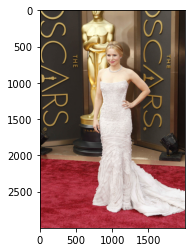

[0] neckline 
[1] dress 
**************************************************
**************************************************


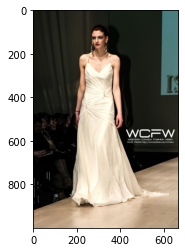

[0] neckline 
[1] dress 
**************************************************
**************************************************


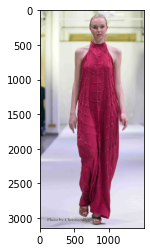

[0] neckline 
[1] dress 
[2] shoe 
**************************************************
**************************************************


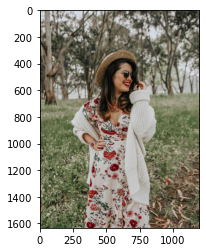

[0] neckline 
[1] cardigan 
[2] dress 
[3] glasses 
[4] hat 
[5] watch 
[6] sleeve 
**************************************************
**************************************************


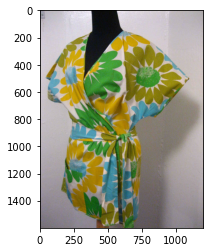

[0] pocket 
[1] neckline 
[2] dress 
[3] belt 
[4] sleeve 
**************************************************


In [13]:
for i in range(5):
    x = np.random.randint(0,len(filtered_df),size=(1,))[0]
    ID = filtered_df['ImageId'].iloc[x]
    classes = filtered_df['SetClassId'].iloc[x]
    print('*'*50)
    plt.imshow(mpimg.imread(f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg'))
    plt.show()
    for j in range(len(classes)):
        print('[{}] {} '.format(j,names[classes[j]]))
    print('*'*50)
    

**************************************************


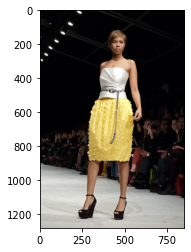

[0] neckline 
[1] top, t-shirt, sweatshirt 
[2] skirt 
[3] belt 
[4] shoe 
**************************************************
**************************************************


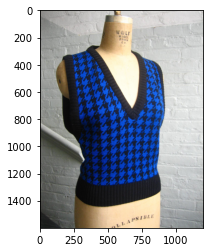

[0] neckline 
[1] vest 
**************************************************
**************************************************


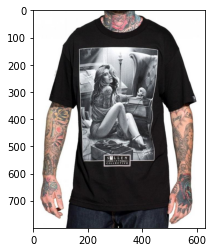

[0] top, t-shirt, sweatshirt 
[1] neckline 
[2] applique 
[3] sleeve 
**************************************************
**************************************************


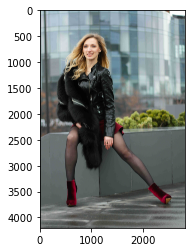

[0] zipper 
[1] jacket 
[2] skirt 
[3] tights, stockings 
[4] shoe 
[5] collar 
[6] lapel 
[7] sleeve 
**************************************************
**************************************************


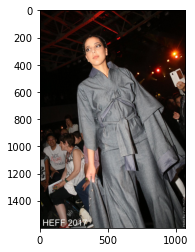

[0] jacket 
[1] jumpsuit 
[2] belt 
[3] collar 
[4] sleeve 
**************************************************


In [14]:
for i in range(5):
    x = np.random.randint(0,len(other_df),size=(1,))[0]
    ID = other_df['ImageId'].iloc[x]
    classes = other_df['SetClassId'].iloc[x]
    print('*'*50)
    plt.imshow(mpimg.imread(f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg'))
    plt.show()
    for j in range(len(classes)):
        print('[{}] {} '.format(j,names[classes[j]]))
    print('*'*50)

# Adding Class Column

Dress = 1 and Non-Dress = 0

In [15]:
filtered_df["Class"]=1
other_df["Class"]=0

/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_23079/4009865848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Class"]=1
/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_23079/4009865848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_df["Class"]=0


Choose a Sample of 10,000 row data

In [601]:
Sample_One=filtered_df.sample(n=500, random_state=1)
Sample_Zero=other_df.sample(n=500, random_state=1)

In [602]:
# Join the two DataFrames based on the 'ImageId' column
merged_df = pd.concat([Sample_One, Sample_Zero], sort=False)

# Print the merged DataFrame
merged_df

,ImageId,SetClassId,Class
23901,85e8704c1a884af54504c7b5ece67dd7,"[33, 10, 23]",1
25944,91a36a8a6a9d6b5d6caebb12ebcb2c1d,"[33, 10, 13, 23, 31]",1
14207,4f423230aeee6d70264a5f0eecd2b0c9,"[33, 10, 19]",1
24037,86ad840a18878cc3c98900e7069185a1,"[33, 10, 21, 23, 31]",1
30219,a9311f428f647d69230d41577f3a762b,"[33, 10]",1
...,...,...,...
15829,58beceab2925552ab65f0c0b2a496559,"[1, 33, 8, 13, 19, 23, 31]",0
32086,b3d004f8f406620af07da07d24cd10c0,"[33, 1, 6, 18, 23, 31]",0
25156,8d1bcd06c93d4bf73375e1bf48f7e7aa,"[32, 35, 4, 8, 42, 21, 23, 28, 30, 31]",0
34118,bf5f8ee9f3ff8edd6fb12612ae76fc5a,"[33, 3, 38, 8, 15, 24, 31]",0


In [603]:
from sklearn.model_selection import train_test_split

In [604]:
y_tc, y_test = train_test_split(merged_df, test_size=0.2, random_state=42)
y_train, y_cv = train_test_split(y_tc, test_size=0.25, random_state=42)

In [605]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_cv = y_cv.reset_index(drop=True)


In [606]:
Ratio=pd.DataFrame((df.Height)/(df.Width))
np.mean(Ratio)

w_num_px=64
h_num_px=int(round(np.mean(Ratio)*w_num_px))

h_num_px

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


88

In [608]:
from PIL import Image
import numpy as np

# Initialize an empty array to hold the images
X_test = np.empty((0, h_num_px, w_num_px, 3), dtype=np.uint8)
Y_test = y_test.copy()
Drop_ID_test=[]


for ID in y_test["ImageId"]:
    try:
        # load image using PIL
        img = Image.open((f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg')).resize((w_num_px, h_num_px))
        # convert to numpy array
        img_array = np.asarray(img)
        array = np.expand_dims(img_array, axis=0)
        X_test = np.append(X_test, array, axis=0)
    except Exception as e:
        print(f"Error loading image {ID}: {e}")
        Drop_ID_test.append(ID)
        #Y_test.drop(Y_test[Y_test["ImageID"] == ID].index, inplace=True)


In [609]:
from PIL import Image
import numpy as np

# Initialize an empty array to hold the images
X_train = np.empty((0, h_num_px, w_num_px, 3), dtype=np.uint8)
Y_train = y_train.copy()
Drop_ID_train=[]

for ID in y_train["ImageId"]:
    try:
        # load image using PIL
        img = Image.open((f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg')).resize((w_num_px, h_num_px))
        # convert to numpy array
        img_array = np.asarray(img)
        array = np.expand_dims(img_array, axis=0)
        X_train = np.append(X_train, array, axis=0)
    except Exception as e:
        print(f"Error loading image {ID}: {e}")
        Drop_ID_train.append(ID)
        #y_train.drop(y_train[y_train['ImageID'] == ID].index, inplace=True)
        

Error loading image 94b357abf2a45614ce99fe0ff30ad84d: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)
Error loading image 3b21276d079ad7b955361db32ae39619: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)
Error loading image 307aba17bfc9a40b9f15453e1c613815: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)


In [610]:
from PIL import Image
import numpy as np

# Initialize an empty array to hold the images
X_cv = np.empty((0, h_num_px, w_num_px, 3), dtype=np.uint8)
Y_cv = y_cv.copy()
Drop_ID_cv=[]

for ID in y_cv["ImageId"]:
    try:
        # load image using PIL
        img = Image.open((f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg')).resize((w_num_px, h_num_px))
        # convert to numpy array
        img_array = np.asarray(img)
        array = np.expand_dims(img_array, axis=0)
        X_cv = np.append(X_cv, array, axis=0)
    except Exception as e:
        print(f"Error loading image {ID}: {e}")
        Drop_ID_cv.append(ID)
        #y_cv.drop(y_cv[y_cv['ImageID'] == ID].index, inplace=True)
        

Error loading image 9b541f60dae448f8f1a9c29923c2d077: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)


In [611]:
for ID in Drop_ID_test:
    Y_test.drop(Y_test[Y_test["ImageId"] == ID].index, inplace=True)

for ID in Drop_ID_train:
    Y_train.drop(Y_train[Y_train['ImageId'] == ID].index, inplace=True)

for ID in Drop_ID_cv:
    Y_cv.drop(Y_cv[Y_cv['ImageId'] == ID].index, inplace=True)

train_set_y=np.array(Y_train["Class"])
test_set_y=np.array(Y_test["Class"])
cv_set_y=np.array(Y_cv["Class"])

In [612]:
train_set_y.shape

(597,)

In [613]:
train_set_x_flatten.shape

(16896, 60)

In [614]:
train_set_x_flatten = X_train.reshape(X_train.shape[0], -1).T
test_set_x_flatten = X_test.reshape(X_test.shape[0], -1).T
cv_set_x_flatten = X_cv.reshape(X_cv.shape[0], -1).T

In [615]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.
cv_set_x = cv_set_x_flatten/255.

# Logistic Regression Model

In [616]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [617]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [618]:
def propagate(w, b, X, Y):

    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b)                                    
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))                                 
    
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    Dw = (1/m)*np.dot(X, (A-Y).T)
    Db = (1/m)*np.sum(A-Y)

    assert(Dw.shape == w.shape)
    assert(Db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"Dw": Dw,
             "Db": Db}
    
    return grads, cost

In [619]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)

        
        # Retrieve derivatives from grads
        Dw = grads["Dw"]
        Db = grads["Db"]
        
        # update rule 
        w = w - learning_rate *Dw
        b = b - learning_rate *Db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"Dw": Dw,
             "Db": Db}
    
    return params, grads, costs

In [620]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X)+b) 
        
    for i in range(A.shape[1]):  
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i] <= 0.5:
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
            
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [621]:
def model(X_train, Y_train, X_test, Y_test, X_cv, Y_cv, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_cv = predict(w, b, X_cv)


    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    print("cv accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_cv - Y_cv)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train,
         "Y_prediction_cv" : Y_prediction_cv,
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return d

train accuracy: 67.8391959798995 %
test accuracy: 52.0 %
cv accuracy: 59.79899497487437 %


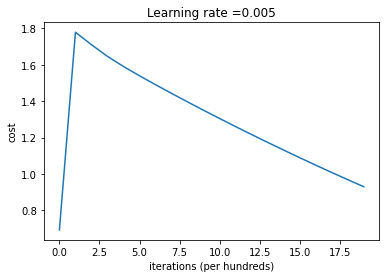

In [622]:
d = model(train_set_x, train_set_y, 
          test_set_x, test_set_y, 
          cv_set_x, cv_set_y,
          num_iterations = 2000, 
          learning_rate = 0.005, print_cost = True)


# Shallow NN

In [623]:
def layer_sizes(X, Y):
    
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    
    return (n_x, n_h, n_y)

In [624]:
(n_x, n_h, n_y) = layer_sizes(train_set_x, train_set_y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 16896
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 597


In [625]:
n_x = train_set_x.shape[0] # size of input layer
n_h = 4
n_y = train_set_y.shape[0] # size of output layer

In [626]:
def initialize_parameters(n_x, n_h, n_y):

    np.random.seed(1)
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))

    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [627]:
def initialize_parameters_deep(layer_dims):
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters


In [628]:
def linear_forward(A, W, b):
    
    Z = np.dot(W,A)+b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache


In [629]:
def relu(Z):
    A = np.maximum(0, Z)
    cache = Z
    return A, cache


In [630]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    return A, cache


In [631]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [632]:
def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). 
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)                  # Add "cache" to the "caches" list
    
    # Implement LINEAR -> SIGMOID. 
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)                      # Add "cache" to the "caches" list
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches


In [633]:
def compute_cost(AL, Y):
    
    Y = Y.reshape(1, -1) # reshape Y to be a row vector

    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = -(1/m)*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [634]:
def sigmoid_backward(dA, activation_cache):
    Z = activation_cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ


In [635]:
def relu_backward(dA, activation_cache):
    Z = activation_cache
    dZ = np.array(dA, copy=True) # Convert dz to a correct object
    dZ[Z <= 0] = 0 # When z <= 0, set dz to 0 as well. 
    return dZ


In [636]:
def linear_backward(dZ, cache):

    A_prev, W, b = cache
    m = A_prev.shape[1]

    dA_prev = np.dot(W.T,dZ)
    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [637]:
def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [638]:
def L_model_backward(AL, Y, caches):
    
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache, "sigmoid")

    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation="relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] =dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [639]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*grads["db" + str(l+1)]

    return parameters

In [640]:
layers_dims = (n_x, n_h, n_y)
layers_dims

(16896, 4, 597)

In [641]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.1, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation="sigmoid")
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## Two layer as an example 

In [650]:
#parameters = two_layer_model(train_set_x, train_set_y, layers_dims = (n_x, n_h, n_y), learning_rate = 0.05,num_iterations = 2500, print_cost=True)

In [576]:
#def predict(parameters, X):

    #A1, cache1 = linear_activation_forward(X, parameters["W1"], parameters["b1"], activation="relu")
    A2, cache2 = linear_activation_forward(A1, parameters["W2"], parameters["b2"], activation="sigmoid")
    predictions = np.where(A2 > 0.5, 1, 0)
    
    return predictions

In [599]:
#predict(parameters, train_set_x)

In [600]:
#predictions = predict(parameters, train_set_x)
#accuracy = float((np.dot(train_set_y,predictions.T) + np.dot(1-train_set_y,1-predictions.T))/float(train_set_y.size)*100)
#accuracy


# L Layer Function

In [642]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [643]:
def predict(parameters, X):

    AL, caches = L_model_forward(X, parameters)
    predictions = np.where(AL > 0.5, 1, 0)
    
    return predictions

# Two Layer with 7 Unit and 4 Unit

In [644]:
layers_dims = [n_x, n_y, 7, 4, 1] #  4-layer model

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.693125
Cost after iteration 200: 0.693111
Cost after iteration 300: 0.693101
Cost after iteration 400: 0.693094
Cost after iteration 500: 0.693089
Cost after iteration 600: 0.693085
Cost after iteration 700: 0.693083
Cost after iteration 800: 0.693082
Cost after iteration 900: 0.693081
Cost after iteration 1000: 0.693080
Cost after iteration 1100: 0.693079
Cost after iteration 1200: 0.693079
Cost after iteration 1300: 0.693079
Cost after iteration 1400: 0.693078
Cost after iteration 1500: 0.693078
Cost after iteration 1600: 0.693078
Cost after iteration 1700: 0.693078
Cost after iteration 1800: 0.693078
Cost after iteration 1900: 0.693078
Cost after iteration 2000: 0.693078
Cost after iteration 2100: 0.693078
Cost after iteration 2200: 0.693078
Cost after iteration 2300: 0.693078
Cost after iteration 2400: 0.693078


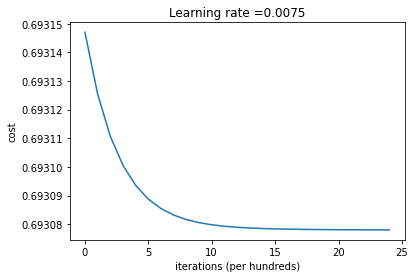

In [645]:
parameters = L_layer_model(train_set_x, train_set_y, layers_dims, num_iterations = 2500, print_cost = True)

In [646]:
predictions = predict(parameters, train_set_x)
accuracy_train = float((np.dot(train_set_y,predictions.T) + np.dot(1-train_set_y,1-predictions.T))/float(train_set_y.size)*100)
print("Train Set:", accuracy_train)

predictions = predict(parameters, test_set_x)
accuracy_test = float((np.dot(test_set_y,predictions.T) + np.dot(1-test_set_y,1-predictions.T))/float(test_set_y.size)*100)
print("Test Set:", accuracy_test)

predictions = predict(parameters, cv_set_x)
accuracy_cv = float((np.dot(cv_set_y,predictions.T) + np.dot(1-cv_set_y,1-predictions.T))/float(cv_set_y.size)*100)
print("CV Set:", accuracy_cv)


Train Set: 50.58626465661642
Test Set: 52.0
CV Set: 47.23618090452261


# One Hidden with L Layer Function

In [647]:
layers_dims = [n_x, n_y, 4, 1] 

Cost after iteration 0: 0.693139
Cost after iteration 100: 0.693095
Cost after iteration 200: 0.693052
Cost after iteration 300: 0.692992
Cost after iteration 400: 0.692893
Cost after iteration 500: 0.692729
Cost after iteration 600: 0.692447
Cost after iteration 700: 0.691964
Cost after iteration 800: 0.691134
Cost after iteration 900: 0.689738
Cost after iteration 1000: 0.687392
Cost after iteration 1100: 0.683544
Cost after iteration 1200: 0.677477
Cost after iteration 1300: 0.668850
Cost after iteration 1400: 0.658815
Cost after iteration 1500: 0.649064
Cost after iteration 1600: 0.639281
Cost after iteration 1700: 0.628173
Cost after iteration 1800: 0.615335
Cost after iteration 1900: 0.599991
Cost after iteration 2000: 0.581144
Cost after iteration 2100: 0.557017
Cost after iteration 2200: 0.575198
Cost after iteration 2300: 0.557382
Cost after iteration 2400: 0.545666


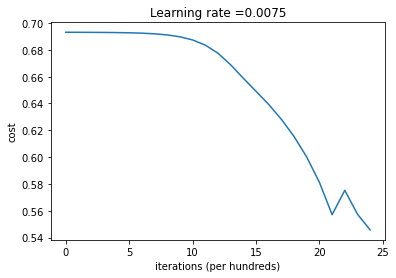

In [648]:
parameters = L_layer_model(train_set_x, train_set_y, layers_dims, num_iterations = 2500, print_cost = True)

In [649]:
predictions = predict(parameters, train_set_x)
accuracy_train = float((np.dot(train_set_y,predictions.T) + np.dot(1-train_set_y,1-predictions.T))/float(train_set_y.size)*100)
print("Train Set:", accuracy_train)

predictions = predict(parameters, test_set_x)
accuracy_test = float((np.dot(test_set_y,predictions.T) + np.dot(1-test_set_y,1-predictions.T))/float(test_set_y.size)*100)
print("Test Set:", accuracy_test)

predictions = predict(parameters, cv_set_x)
accuracy_cv = float((np.dot(cv_set_y,predictions.T) + np.dot(1-cv_set_y,1-predictions.T))/float(cv_set_y.size)*100)
print("CV Set:", accuracy_cv)

Train Set: 71.85929648241206
Test Set: 56.99999999999999
CV Set: 52.26130653266332
